# Confidence Intervals

In [1]:
from scipy.stats import norm

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
z1 = norm.ppf(0.025)
z2 = norm.ppf(1 - 0.025)

In [4]:
z1

-1.9599639845400545

In [5]:
z2

1.959963984540054

In [6]:
'''
Example 1 ->
n = 100
mean = 65
sigma = 2.5
'''

'\nExample 1 ->\nn = 100\nmean = 65\nsigma = 2.5\n'

In [10]:
mean = 65

In [11]:
std_error = 2.5 / 10

In [12]:
std_error

0.25

In [16]:
x1 = mean - (-1.96) * std_error
x2 = mean - (1.96) * std_error

In [17]:
x1

65.49

In [18]:
x2

64.51

In [19]:
[64.51, 65.49] # 95% confidence interval

[64.51, 65.49]

In [20]:
# norm.interval(confidence, loc (mean), standard error)

norm.interval(0.95, loc = 65, scale = std_error)

(64.51000900386498, 65.48999099613502)

In [21]:
'''
Quiz 1 -
From a sample of 80 endangered birds,
the average wingspan was found to be 45 cm, with a population standard deviation of 10 cm.
What is the correct confidence interval of the mean wingspan of the entire population with 90% confidence.
'''

'\nQuiz 1 -\nFrom a sample of 80 endangered birds,\nthe average wingspan was found to be 45 cm, with a population standard deviation of 10 cm.\nWhat is the correct confidence interval of the mean wingspan of the entire population with 90% confidence.\n'

In [22]:
std_error = 10 / (80 ** 0.5)

In [23]:
std_error

1.118033988749895

In [24]:
norm.interval(0.9, loc = 45, scale = std_error)

(43.16099773854971, 46.83900226145029)

In [25]:
'''
Example -
In a software project, the team estimates bug resolution time at an average of 6 hours
with a standard deviation of 2 hours.
To estimate the mean resolution time with 99% confidence, the project manager samples 25 resolved bugs.
What is the correct confidence interval?
'''

'\nExample -\nIn a software project, the team estimates bug resolution time at an average of 6 hours\nwith a standard deviation of 2 hours.\nTo estimate the mean resolution time with 99% confidence, the project manager samples 25 resolved bugs.\nWhat is the correct confidence interval?\n'

In [30]:
# Bootstrapping for CI

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
survey_1 = [35, 36, 33, 37, 34, 35]
survey_2 = [20, 37, 17, 50, 53, 33]

In [28]:
np.mean(survey_1)

35.0

In [29]:
np.mean(survey_2)

35.0

In [76]:
n = 6
bootstrapped_sample = np.random.choice(survey_2, size = n)

In [77]:
bootstrapped_sample

array([50, 20, 50, 37, 50, 53])

In [78]:
np.mean(bootstrapped_sample)

43.333333333333336

<AxesSubplot:ylabel='Count'>

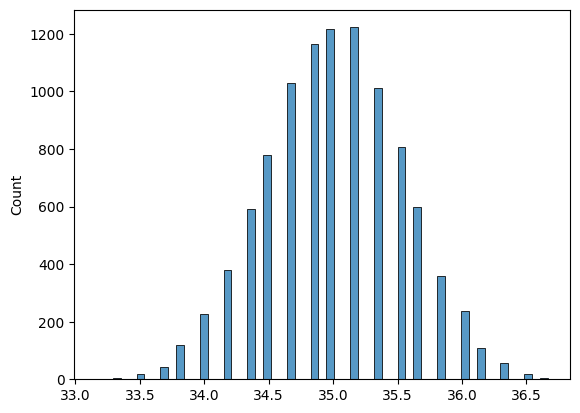

In [83]:
bootstrapped_means_survey_1 = []

for reps in range(10000):
    bootstrapped_sample = np.random.choice(survey_1, size = n)
    bootstrapped_mean = np.mean(bootstrapped_sample)
    bootstrapped_means_survey_1.append(bootstrapped_mean)
    
sns.histplot(bootstrapped_means_survey_1)

<AxesSubplot:ylabel='Count'>

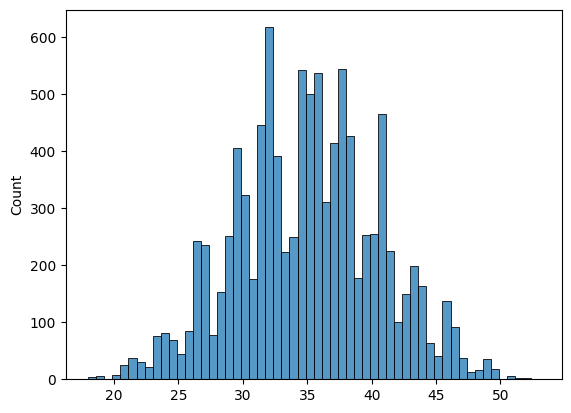

In [87]:
bootstrapped_means_survey_2 = []

for reps in range(10000):
    bootstrapped_sample = np.random.choice(survey_2, size = n)
    bootstrapped_mean = np.mean(bootstrapped_sample)
    bootstrapped_means_survey_2.append(bootstrapped_mean)
    
sns.histplot(bootstrapped_means_survey_2)

In [89]:
x1 = np.percentile(bootstrapped_means_survey_1, 2.5)
x2 = np.percentile(bootstrapped_means_survey_1, 97.5)

In [90]:
print(x1, x2)

34.0 36.0


In [91]:
x1 = np.percentile(bootstrapped_means_survey_2, 2.5)
x2 = np.percentile(bootstrapped_means_survey_2, 97.5)

In [92]:
print(x1, x2)

24.0 46.0


# Log Normal Distribution

In [93]:
data = pd.read_csv("waiting_time.csv")
data.head()

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


<AxesSubplot:ylabel='Count'>

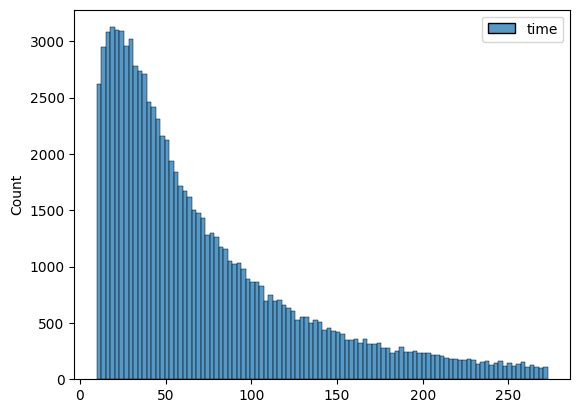

In [94]:
sns.histplot(data, bins = 100)

In [95]:
data_log = np.log(data)

In [96]:
data_log

,time
0,5.214952
1,3.603363
2,3.400211
3,4.325989
4,4.118865
...,...
90041,4.911816
90042,2.722871
90043,5.336766
90044,4.945125


<AxesSubplot:ylabel='Count'>

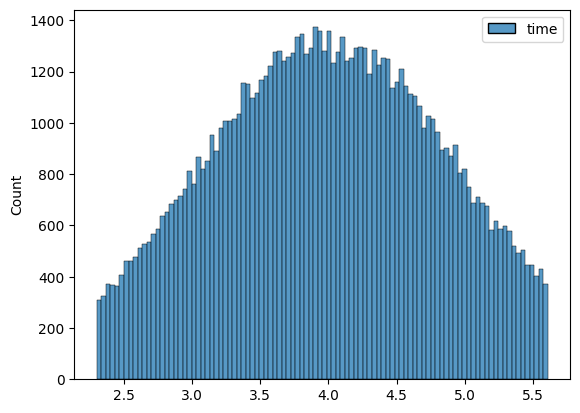

In [97]:
sns.histplot(data_log, bins = 100)

# Poisson Distribution

In [100]:
'''
Modelling for a number of events that occur in a fixed interval of time

Toll booth on a highway - 
    - Fixed Interval - 1 hour
    - Average Rate - 30 vehicles per hour
'''

'\nModelling for a number of events that occur in a fixed interval of time\n\nToll booth on a highway - \n    - Fixed Interval - 1 hour\n    - Average Rate - 30 vehicles per hour\n'

In [101]:
from scipy.stats import poisson

In [102]:
# poisson.pmf(k, mu)

# k -> Number of events (exact)
# mu -> Average Rate

In [103]:
poisson.pmf(k = 1, mu = 2)

0.2706705664732254

In [104]:
'''
Rules / Conditions for Poisson's Distribution ->
    - Events should be countable and discrete
    - Events should be independent
    - Rate should be known and remain constant
    - Events should not occur simultaneously
'''

"\nRules / Conditions for Poisson's Distribution ->\n    - Events should be countable and discrete\n    - Events should be independent\n    - Rate should be known and remain constant\n    - Events should not occur simultaneously\n"

In [105]:
'''
HOMEWORK EXAMPLES ->

1. A city sees 3 accidents per day on average.
Find the probability that there will be 5 accidents tomorrow.

2. Find the probability that there will be 5 or fewer accidents tomorrow.

3. Let “X” be the number of typos in a page in a printed book, with mean of 3 typos per page.
What is the probability that a randomly selected page has atmost 1 typo?

4. The shop is open for 8 hours. The average number of customers is 74 - assume Poisson distributed.  
(a) What is the probability that in 2 hours, there will be at most 15 customers?  
(b)What is the probability that in 2 hours, there will be at least 7 customers?
'''

'\nHOMEWORK EXAMPLES ->\n\n1. A city sees 3 accidents per day on average.\nFind the probability that there will be 5 accidents tomorrow.\n\n2. Find the probability that there will be 5 or fewer accidents tomorrow.\n\n3. Let “X” be the number of typos in a page in a printed book, with mean of 3 typos per page.\nWhat is the probability that a randomly selected page has atmost 1 typo?\n\n4. The shop is open for 8 hours. The average number of customers is 74 - assume Poisson distributed.  \n(a) What is the probability that in 2 hours, there will be at most 15 customers?  \n(b)What is the probability that in 2 hours, there will be at least 7 customers?\n'

# Geometric Distribution

Imagine, you're in a job search and you're giving interviews till you land your first job.

What are the possible outcomes? -> S or F

S = {s, fs, ffs, fffs....}
P = {0.1, 0.9 * 0.1, 0.9 * 0.9 * 0.1...}

Success Rate = p = 0.1
Failure Rate = 1 - p = 0.9

`P(X = k) = ((1 - p) ** (k-1)) * p`

In [1]:
x_vals = np.arange(1, 20)
p = 0.1

NameError: name 'np' is not defined